In [1]:
#THE FOLLOWING CODE IS A COMBINATION OF DIFFERENT FILES 
#FROM AUTHORS ABDUL, MURTUZA, DEVESH
#THE CODE HAS BEEN MOTIVATED FROM DIFFERENT LINKS PROVIDED IN THE REPORT

#FILTERING OF THE DATASET
#Importing the libraries
import os
import json
import shutil # for copying the files
import os.path # for setting the destination folder
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn.cluster import KMeans
import os, shutil, glob, os.path
from sklearn.cluster import AgglomerativeClustering

# importing the library for extracting the winrar files
try:
    import lzma
except ImportError:
    from backports import lzma



###############################################################################

In [2]:
# cell for finding average number of images


import numpy as np
import statistics

# Main Dir after filter
maindir = 'E:/insta filter/#covid_19/'
folder =[]
os.chdir(maindir)
#Determining the country code in the folder
for name in os.listdir("."):
    if os.path.isdir(name):
        folder.append(name)

totaljpg = []
images_folders=[]
#Determining the files in the country
for name in folder:
    ogdir = maindir + name +'/'
    os.chdir(ogdir)
    #changing the directory and finding jpg files
    for file in glob.glob("*.jpg"):
        totaljpg.append(file)
    images_folders.append(len(totaljpg))
    totaljpg=[]
l=[]
for i in images_folders:
    if i>500:
        l.append(500)
    else:
        l.append(i)
avg_no_images=int(np.round(statistics.mean(l)))
print(avg_no_images)

165


In [3]:
'''
# tesing cell to find number of images in 3 different range of length(< avg, <500, >500)


maindir = 'E:/insta filter/#covid_19/'
folder =[]
os.chdir(maindir)
#Determining the country code in the folder
for name in os.listdir("."):
    if os.path.isdir(name):
        folder.append(name)

#Initialize no. of clusters to zero
i = 0
j=0
k=0
n=[]
onlyfiles = []
import random
#Determining the files in the country
for name in folder:
    ogdir = maindir + name +'/'
    os.chdir(ogdir)
    #changing the directory and finding jpg files
    for file in glob.glob("*.jpg"):
        onlyfiles.append(file)
    if len(onlyfiles) < avg_no_images:
        onlyfiles=[]
        i+=1
        continue #If the images are less than 50 we do not consider that folder
    else:
        if len(onlyfiles) <=500:
            n.append(len(onlyfiles))
            j+=1
        else:
            n.append(len(random.sample(onlyfiles, 500)))
            #print(onlyfiles)
            k+=1
        onlyfiles=[]
        #print(len(onlyfiles))
print(i,j,k)
print(len(n))'''

'\n# tesing cell to find number of images in 3 different range of length(< avg, <500, >500)\n\n\nmaindir = \'E:/insta filter/#covid_19/\'\nfolder =[]\nos.chdir(maindir)\n#Determining the country code in the folder\nfor name in os.listdir("."):\n    if os.path.isdir(name):\n        folder.append(name)\n\n#Initialize no. of clusters to zero\ni = 0\nj=0\nk=0\nn=[]\nonlyfiles = []\nimport random\n#Determining the files in the country\nfor name in folder:\n    ogdir = maindir + name +\'/\'\n    os.chdir(ogdir)\n    #changing the directory and finding jpg files\n    for file in glob.glob("*.jpg"):\n        onlyfiles.append(file)\n    if len(onlyfiles) < avg_no_images:\n        onlyfiles=[]\n        i+=1\n        continue #If the images are less than 50 we do not consider that folder\n    else:\n        if len(onlyfiles) <=500:\n            n.append(len(onlyfiles))\n            j+=1\n        else:\n            n.append(len(random.sample(onlyfiles, 500)))\n            #print(onlyfiles)\n      

In [4]:
### creating data for first 500 images folder to find best k value


import random
#Feature extraction VGG16 and KMeans clustering using Imagenet data
image.LOAD_TRUNCATED_IMAGES = True
model = VGG16(weights='imagenet', include_top=False)
# Main Dir after filter
maindir = 'E:/insta filter/#covid_19/'
folder =[]
os.chdir(maindir)
#Determining the country code in the folder
for name in os.listdir("."):
    if os.path.isdir(name):
        folder.append(name)

#Initialize no. of clusters to zero
number_clusters = 0
onlyfiles = []
#Determining the files in the country
#cluster_bool=False
for name in folder:
    ogdir = maindir + name +'/'
    os.chdir(ogdir)
    #changing the directory and finding jpg files
    for file in glob.glob("*.jpg"):
        onlyfiles.append(file)
    
    if len(onlyfiles) < 500:
        onlyfiles=[]
        continue #If the images are less than 50 we do not consider that folder
    else:
        onlyfiles=random.sample(onlyfiles, 500)
            
    filelist = glob.glob(os.path.join(ogdir, '*.jpg'))
    filelist = random.sample(filelist, 500)
    #print(filelist[5].split('\\')[-1])
    #print(onlyfiles[0])
    #break
    filelist.sort() #files to extract features
    featurelist = []
    for i, path in enumerate(filelist):
        print("    Status: %s / %s" %(i, len(filelist)), end="\r")
        img = image.load_img(path, target_size=(224, 224)) #loading image 224x224 size
        data = image.img_to_array(img) 
        data = np.expand_dims(data, axis=0)
        data = preprocess_input(data)
        features = np.array(model.predict(data))
        featurelist.append(features.flatten())
    
    break

In [5]:
# elbow method on generated sample data
inertias = [] 
K = range(1,20) 
for k in K: 
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(np.array(featurelist))
    inertias.append(kmeanModel.inertia_)

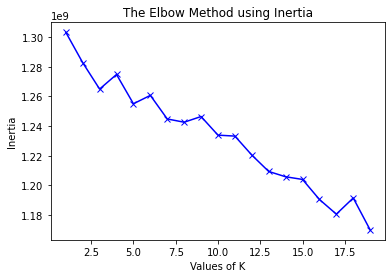

In [7]:
import matplotlib.pyplot as plt
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [19]:
#from above grapgh taking 6 as maximum number of clusters for 1000 images

In [8]:
import random
image.LOAD_TRUNCATED_IMAGES = True
model = VGG16(weights='imagenet', include_top=False)
# Main Dir after filter
maindir = 'E:/insta filter/#covid_19/'
folder =[]
os.chdir(maindir)
#Determining the country code in the folder
for name in os.listdir("."):
    if os.path.isdir(name):
        folder.append(name)

#Initialize no. of clusters to zero
number_clusters = 0
#onlyfiles = []
#Determining the files in the country
for name in folder:
    number_clusters = 0
    ogdir = maindir + name +'/'
    os.chdir(ogdir)
    
    filelist = glob.glob(os.path.join(ogdir, '*.jpg'))
    if (len(filelist) < avg_no_images):
        filelist=[]
        continue 
    elif ((len(filelist) >= avg_no_images) and (len(filelist) <= 500)):
        number_clusters = int(6)
        print('6 clusters taken')
    elif ((len(filelist) > 500) and (len(filelist) <= 700)):
        number_clusters = int(7)
        print('7 clusters taken')
    elif ((len(filelist) > 700) and (len(filelist) <= 1000)):
        number_clusters = int(8)
        print('8 clusters taken')
    else:
        number_clusters = int(10)
        print('10 clusters taken')
    if number_clusters != 0:
        print('len of images in folder: ',len(filelist))
        if len(filelist) >1500:
            filelist = random.sample(filelist, 1500)
        print('len of images after sampling: ',len(filelist))
        print('final num of clusters :', number_clusters)
        filelist.sort() #files to extract features
        featurelist = []
        for i, path in enumerate(filelist):
            print("    Status: %s / %s" %(i, len(filelist)), end="\r")
            img = image.load_img(path, target_size=(224, 224)) #loading image 224x224 size
            data = image.img_to_array(img) 
            data = np.expand_dims(data, axis=0)
            data = preprocess_input(data)
            features = np.array(model.predict(data)) #Features extracted through transformation to array and dimension expansion
            featurelist.append(features.flatten()) #storing all features of the images
        kmeans = KMeans(n_clusters=number_clusters, random_state=0).fit(np.array(featurelist)) #Performing KMeans clustering on the features
        print("\n")
        targetdir = ogdir+"vgg16/" #Target Directory images being stored
        try:
            os.makedirs(targetdir)
        except OSError:
            pass
        for i, m in enumerate(kmeans.labels_):
            print("    Copy: %s / %s" %(i, len(kmeans.labels_)), end="\r")
            shutil.copy(filelist[i], targetdir + str(m) + "_" + str(filelist[i].split('\\')[-1])) #Copying the images to respective folders

        onlyfiles=[] #Initializing no. of files to zero as swithing to new fodler
        number_clusters=0

8 clusters taken
len of images in folder:  716
len of images after sampling:  716
final num of clusters : 8
    Status: 715 / 716

10 clusters taken16
len of images in folder:  4764
len of images after sampling:  1500
final num of clusters : 10
    Status: 1499 / 1500

6 clusters taken 1500
len of images in folder:  247
len of images after sampling:  247
final num of clusters : 6
    Status: 246 / 247

10 clusters taken47
len of images in folder:  2346
len of images after sampling:  1500
final num of clusters : 10
    Status: 1499 / 1500

6 clusters taken 1500
len of images in folder:  309
len of images after sampling:  309
final num of clusters : 6
    Status: 308 / 309

6 clusters taken309
len of images in folder:  298
len of images after sampling:  298
final num of clusters : 6
    Status: 297 / 298

10 clusters taken98
len of images in folder:  8309
len of images after sampling:  1500
final num of clusters : 10
    Status: 1499 / 1500

10 clusters taken1500
len of images in folder:

10 clusters taken38
len of images in folder:  4623
len of images after sampling:  1500
final num of clusters : 10
    Status: 1499 / 1500

10 clusters taken1500
len of images in folder:  17656
len of images after sampling:  1500
final num of clusters : 10
    Status: 1499 / 1500

6 clusters taken 1500
len of images in folder:  290
len of images after sampling:  290
final num of clusters : 6
    Status: 289 / 290

10 clusters taken90
len of images in folder:  2119
len of images after sampling:  1500
final num of clusters : 10
    Status: 1499 / 1500

10 clusters taken1500
len of images in folder:  1086
len of images after sampling:  1086
final num of clusters : 10
    Status: 1085 / 1086

